In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/global/homes/e/ecastori/PostBorn/'

In [3]:
data = np.loadtxt(path+'FFT_k-1Pk.dat',skiprows=2)

#----------------------#
n         = data[:,0]
Re_c_n    = data[:,1]
Im_c_n    = data[:,2]
Re_nu_n   = data[:,3]
Im_nu_n   = data[:,4]
#----------------------#

c_n  = Re_c_n  + 1j * Im_c_n
nu_n = Re_nu_n + 1j * Im_nu_n

In [4]:
data = np.loadtxt(path+'Il_nu_t_new1.dat',skiprows=1)

#----------------------#
ell       = data[:,0]
nn        = data[:,1]
tt        = data[:,2]
Re_I      = data[:,3]
Im_I      = data[:,4]
#----------------------#

I_ = Re_I + 1j * Im_I

In [5]:
data = np.loadtxt(path+'GG_weights.dat',skiprows=2)
t1   = data[:,0]
w1   = data[:,1]

In [6]:
print(np.unique(tt)-t1)

[ 3.30000000e-12  1.99999956e-13  3.30000001e-11 -1.89999999e-11
 -2.10000003e-11  4.69999994e-11 -2.40000001e-10  1.20000000e-10
 -1.30000000e-10 -4.60000000e-10 -7.00000023e-11  4.79999998e-10
 -7.00000058e-11 -4.90000006e-10 -4.89999999e-10  3.10000005e-10
 -2.49999993e-10  6.00000050e-11  6.00000050e-11 -1.70000000e-10
  3.80000000e-09 -4.79999999e-09  7.00000002e-10 -4.89999999e-09
  1.20000002e-09  2.99999997e-10  2.20000002e-09 -4.29999999e-09
 -1.00000008e-10  4.89999999e-09  3.70000000e-09  4.00000000e-09
  1.00000008e-10 -4.60000005e-09 -4.90000002e-09 -1.09999998e-09
  4.20000001e-09 -8.00000011e-10 -3.19999999e-09 -2.00000000e-09
 -4.00000000e-09 -2.00000017e-10 -9.00000019e-10 -2.00000000e-09
 -3.00000025e-10  1.40000000e-09 -1.79999998e-09 -1.39999995e-09
 -1.19999999e-09 -2.20000002e-09  2.19999996e-09  1.19999999e-09
  1.40000000e-09  1.79999993e-09 -1.39999989e-09  2.99999914e-10
  1.99999994e-09  8.99999963e-10  2.00000017e-10  4.00000000e-09
  2.00000005e-09  3.20000

In [7]:
#cosmology
h         = 0.6770
omega_cdm = 0.11923
omega_b   = 0.02247
Omega_b   = omega_b/h**2
Omega_cdm = omega_cdm/h**2
Omega_m   = Omega_b+Omega_cdm
ns        = 0.96824
A0        = 2.10732*10**(-9)

#dictionary for class
cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
print(cosmo_dict)

# speed of light
c      = 299792458./1000. # km/s

#prefactor for Cl_kk computation from Cl_dd
prefac = 1.5*Omega_m*(100.)**2/c**2 #without h

{'h': 0.677, 'omega_b': 0.02247, 'omega_cdm': 0.11923, 'A_s': 2.10732e-09, 'n_s': 0.96824, 'k_pivot': 0.05}


In [8]:
from classy import Class
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
cosmo_b               = cosmo.get_background()

class_z               = cosmo_b['z'][::-1]
class_chi             = cosmo_b['comov. dist.'][::-1]
class_D               = cosmo_b['gr.fac. D'][::-1]#/cosmo_b['gr.fac. D'][-1]

derivParams           = cosmo.get_current_derived_parameters(['z_rec'])
z_cmb                 = derivParams['z_rec']


from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as ius
chi_z = interp1d(class_z,class_chi*h)
z_chi = interp1d(class_chi*h,class_z)  # Mpc/h
D_chi = interp1d(class_chi*h,class_D)    # growth
D_z   = interp1d(class_z,class_D)
# chi_cmb
chi_cmb = chi_z(z_cmb)



In [9]:
plt.figure()
print(chi_z(1100),chi_z(z_cmb))

9416.066449341572 9414.597956961139


<Figure size 432x288 with 0 Axes>

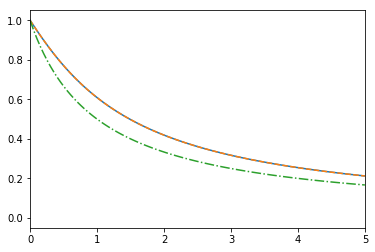

array(1.)

In [10]:
z = np.linspace(0,5,100)
plt.figure()
plt.plot(class_z,class_D,ls='-')
plt.plot(z,D_z(z),ls='--')
plt.plot(z,1/(1+z),ls='-.')
plt.xlim(0,5)
plt.show()
D_z(0)

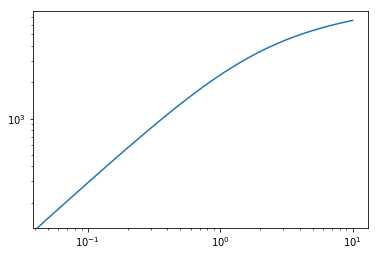

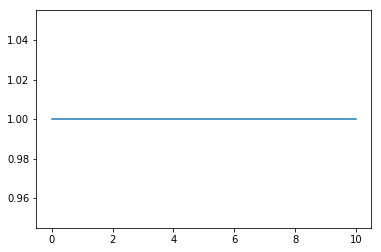

In [11]:
z=np.linspace(0.,10,200)
plt.figure()
plt.loglog(z,chi_z(z))
plt.show()
plt.figure()
plt.plot(z,D_z(z)/D_chi(chi_z(z)))
plt.show()
# plt.figure()
# plt.loglog(z,)
# plt.show()
# plt.figure()
# plt.loglog(z,z_chi(chi_z(z)))
# plt.show()

In [12]:
D_chi(chi_z(0.1))

array(0.94886829)

In [13]:
4./np.pi

1.2732395447351628

In [14]:
def set_kernel(chi_max):
    def kernel(chi):
        return (1.+z_chi(chi))*D_chi(chi)
    return kernel

In [15]:
W = set_kernel(chi_cmb)

In [16]:
ell_ = np.unique(ell)
nu_n_= np.unique(nu_n) 
print(nu_n_)
print(ell_)
print(np.unique(tt))
t_=np.unique(tt)
assert(np.allclose(t_,t1))
print(len(nu_n_),len(n),len(c_n),len(t_))
print(len(tt),len(I_))

[-1.9-27.94471j   -1.9-27.665263j  -1.9-27.385816j  -1.9-27.106369j
 -1.9-26.826921j  -1.9-26.547474j  -1.9-26.268027j  -1.9-25.98858j
 -1.9-25.709133j  -1.9-25.429686j  -1.9-25.150239j  -1.9-24.870792j
 -1.9-24.591345j  -1.9-24.311898j  -1.9-24.03245j   -1.9-23.753003j
 -1.9-23.473556j  -1.9-23.194109j  -1.9-22.914662j  -1.9-22.635215j
 -1.9-22.355768j  -1.9-22.076321j  -1.9-21.796874j  -1.9-21.517427j
 -1.9-21.237979j  -1.9-20.958532j  -1.9-20.679085j  -1.9-20.399638j
 -1.9-20.120191j  -1.9-19.840744j  -1.9-19.561297j  -1.9-19.28185j
 -1.9-19.002403j  -1.9-18.722956j  -1.9-18.443509j  -1.9-18.164061j
 -1.9-17.884614j  -1.9-17.605167j  -1.9-17.32572j   -1.9-17.046273j
 -1.9-16.766826j  -1.9-16.487379j  -1.9-16.207932j  -1.9-15.928485j
 -1.9-15.649038j  -1.9-15.36959j   -1.9-15.090143j  -1.9-14.810696j
 -1.9-14.531249j  -1.9-14.251802j  -1.9-13.972355j  -1.9-13.692908j
 -1.9-13.413461j  -1.9-13.134014j  -1.9-12.854567j  -1.9-12.575119j
 -1.9-12.295672j  -1.9-12.016225j  -1.9-11.736778j

In [38]:
m=0
I_array=np.zeros((len(ell_),len(nu_n_),len(t_)),dtype=np.complex64)
I2D = np.zeros((len(ell_),len(nu_n_),len(t_),len(t_)),dtype=np.complex64)
for ii,ll in enumerate(ell_):
    for jj, nu in enumerate(nu_n_):
            #for kk, _ in enumerate(t_):
        I_array[ii,jj,:]=I_[m:m+len(t_)]
        _, I2D_ = np.meshgrid(t_,I_array[ii,jj])
        I2D[ii][jj] = I2D_
        m+=len(t_)

In [39]:
from scipy.integrate import simps, quadrature
from scipy.interpolate import interp1d
import time

begin=time.time()
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)
result=[]
for ii,ll in enumerate(ell_):
    print(ii)
    res1=[]
    for jj, nu in enumerate(nu_n_):
        #_, I2D = np.meshgrid(t_,I_array[ii,jj])
        integrand=(1.-r2d*t2d)/t2d*(1.-r2d)/r2d*I2D[ii][jj]*W(r2d*t2d*chi_cmb)*W(r2d*chi_cmb)*(r2d*chi_cmb)**(-nu)
        res1+=[np.sum(w11*w12*integrand)]
    result+=[np.real(np.sum(res1[0:-1]*c_n[0:-1]*2.)+res1[-1]*c_n[-1])]
print(time.time()-begin)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
Cl=np.real(np.asarray(result))*4./np.pi**2*prefac**2/4.
print(ell_,Cl)

[   2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.
   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.
   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.
   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  110.  120.  130.  140.  150.  160.  170.  180.  190.
  200.  210.  220.  230.  240.  250.  260.  270.  280.  290.  300.  310.
  320.  330.  340.  350.  360.  370.  380.  390.  400.  410.  420.  430.
  440.  450.  460.  470.  480.  490.  500.  510.  520.  530.  540.  550.
  560.  570.  580.  590.  600.  610.  620.  630.  640.  650.  660.  670.
  680.  690.  700.  710.  720.  730.  740.  750.  7

(2, 500)

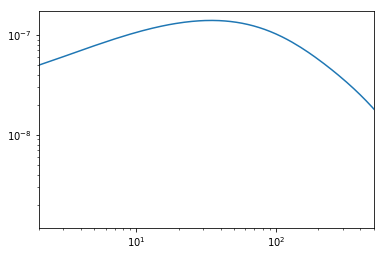

In [41]:
plt.figure()
plt.loglog(ell_,(ell_*(ell_+1.))**2*Cl/(2.*np.pi))
plt.xlim(2,500)

In [42]:
# cosmo = Class()

# cosmo_dict={'h': h,
# 'omega_b' : omega_b,
# 'omega_cdm': omega_cdm,
# 'A_s'    : A0,
# 'n_s'    : ns,
# 'k_pivot' : 0.05}
# cosmo_dict['output']='lCl, tCl'
# cosmo_dict['l_max_scalars']=2000
# cosmo_dict['lensing']='yes'
# cosmo_dict['l_switch_limber']=100
# cosmo_dict['perturb_sampling_stepsize']=0.01

# cosmo.set(cosmo_dict)
# cosmo.compute()
# cllen= cosmo.lensed_cl(lmax=1000)
# ll = cllen['ell']
# clpp = cllen['pp']

In [51]:
ll,clpp,clpp2 = np.loadtxt('class_ouput.out')

In [52]:
data=np.loadtxt(path+'Cell_marko.dat')
cl = data[:,1]

ls = data[:,0]


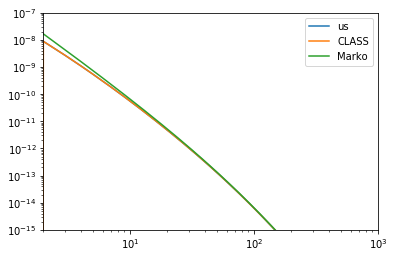

In [53]:
plt.figure()
plt.loglog(ell_,Cl,label='us')
plt.loglog(ll,clpp,label='CLASS')
plt.loglog(ls,cl,label='Marko')
plt.xlim(2,1000)
plt.ylim(1e-15,1e-7)
plt.legend()


In [54]:
Cl

array([8.71508041e-09, 2.65036884e-09, 1.10030879e-09, 5.45376950e-10,
       3.03425801e-10, 1.83150591e-10, 1.17487251e-10, 7.90037463e-11,
       5.51654474e-11, 3.97269204e-11, 2.93531881e-11, 2.21657835e-11,
       1.70541764e-11, 1.33363730e-11, 1.05779643e-11, 8.49617768e-12,
       6.90071109e-12, 5.66140452e-12, 4.68688062e-12, 3.91212741e-12,
       3.28990893e-12, 2.78559676e-12, 2.37336212e-12, 2.03384433e-12,
       1.75222591e-12, 1.51712567e-12, 1.31966684e-12, 1.15285985e-12,
       1.01119154e-12, 8.90286397e-13, 7.86596459e-13, 6.97305346e-13,
       6.20088919e-13, 5.53066872e-13, 4.94675774e-13, 4.43623774e-13,
       3.98856548e-13, 3.59472540e-13, 3.24704152e-13, 2.93947332e-13,
       2.66647196e-13, 2.42366528e-13, 2.20715810e-13, 2.01357373e-13,
       1.84022223e-13, 1.68457316e-13, 1.54457280e-13, 1.41841132e-13,
       1.30447979e-13, 1.20136897e-13, 1.10796141e-13, 1.02316626e-13,
       9.46043296e-14, 8.75815034e-14, 8.11773488e-14, 7.53278576e-14,
      

In [55]:
# cosmo = Class()

# cosmo_dict={'h': h,
# 'omega_b' : omega_b,
# 'omega_cdm': omega_cdm,
# 'A_s'    : A0,
# 'n_s'    : ns,
# 'k_pivot' : 0.05}
# cosmo_dict['output']='lCl, tCl, mPk'
# cosmo_dict['l_max_scalars']=2000
# cosmo_dict['lensing']='yes'
# cosmo_dict['l_switch_limber']=1

# cosmo.set(cosmo_dict)
# cosmo.compute()
# cllen= cosmo.lensed_cl(lmax=1000)
# ll2 = cllen['ell']
# clpp2 = cllen['pp']

# cosmo.sigma8()

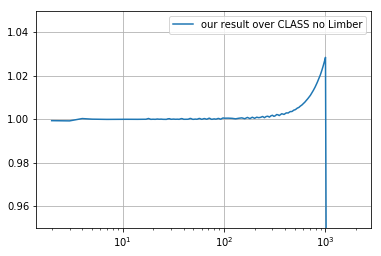

In [56]:
plt.figure()#
plt.semilogx(ell_,Cl/np.interp(ell_,ll,clpp), label='our result over CLASS no Limber')
#plt.semilogx(ell_,Cl/np.interp(ell_,ll,clpp)/1.13, label='our result/1.13 over CLASS no Limber')
#plt.semilogx(ell_,np.interp(ell_,ls,cl)/Cl)
#plt.semilogx(ls,cl/np.interp(ls,ll,clpp), label='Markos result over CLASS no Limber')
#plt.axhline(1,color='black')
plt.ylim(0.95,1.05)
plt.grid()
plt.legend()

In [57]:
import camb
from camb import model, initialpower
print('CAMB version: %s '%camb.__version__)

CAMB version: 0.1.9 


In [58]:
#np.savetxt('class_ouput.out',X=(ll2,clpp,clpp2))



/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


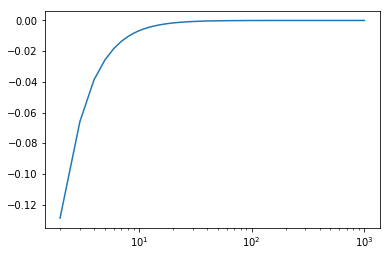

In [59]:
plt.semilogx(ll,clpp2/clpp-1, label='CLASS Limber over CLASS no Limber')

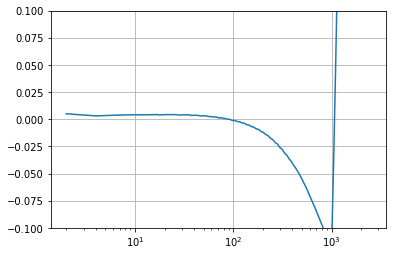

In [60]:
#ratio class over camb
ll,clpp,clpp2 = np.loadtxt('class_ouput.out')
c_ell,cl_limber,cl_limber2,cl_camb = np.loadtxt('camb_cls.out')
clpp=np.interp(c_ell,ll,(ll*(ll+1.))**2*clpp/2./np.pi)
clpp2=np.interp(c_ell,ll,(ll*(ll+1.))**2*clpp2/2./np.pi)
plt.semilogx(c_ell,clpp/cl_camb-1, label='CLASS over CAMB no Limber -1')
plt.ylim(-0.1,0.1)
plt.grid()

In [61]:
def cmb_kernel(chi):
    return D_chi(chi)*(1.+z_chi(chi))*(chi_cmb-chi)/chi_cmb/chi

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.07240815e+02 5.85890048e+02
 8.42687933e+02 1.21131429e+03 1.73915884e+03 2.49156929e+03
 3.55528429e+03 5.04045409e+03 7.07240966e+03 9.76205855e+03
 1.31518242e+04 1.71045771e+04 2.11424719e+04 2.42813391e+04
 2.49685296e+04 2.17737736e+04 1.58071185e+04 1.14653914e+04
 7.88827304e+03 4.46692041e+03 2.36493028e+03 1.25014560e+03
 5.89889068e+02 2.69918910e+02 1.18363016e+02 5.00650628e+01
 2.05960307e+01 8.26811134e+00 3.25044742e+00 1.25703804e+00
 4.77907014e-01 1.79802604e-01 6.66311486e-02 2.45380898e-02
 8.91225148e-03 3.21667043e-03 1.14436251e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


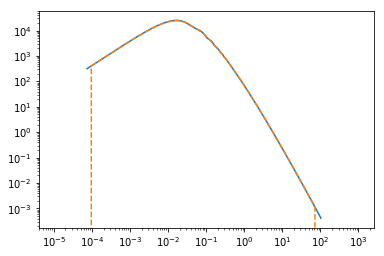

In [62]:
data=np.loadtxt('class_pk.dat')
kh = data[:,0]
Pkh = data[:,1]
plt.figure()
plt.loglog(kh,Pkh)

pki=interp1d(kh,Pkh,bounds_error=False, fill_value=0.)

kk = np.logspace(-5,3)
plt.loglog(kk,pki(kk),ls='--')
print(pki(kk))

In [63]:
chis = np.linspace(50,chi_cmb,1000)

clpp_=[]
for ll in ell_:
    print(ll)
    integrand =[]
    for chi_ in chis:
        k_ = ll/chi_
        pk = pki(k_)/k_**4 #p_psi
        integrand+=[pk*cmb_kernel(chi_)**2/chi_**2]
    clpp_+=[simps(integrand,chis)]

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0
410.0
420.0
430.0
440.0
450.0
460.0
470.0
480.0
490.0
500.0
510.0
520.0
530.0
540.0
550.0
560.0
570.0
580.0
590.0
600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0
710.0
720.0
730.0
740.0
750.0
760.0
770.0
780.0
790.0
800.0
810.0
820.0
830.0
840.0
850.0
860.0
870.0
880.0
890.0
900.0
910.0
920.0
930.0
940.0
950.0
96

In [64]:
clpp_=np.array(clpp_)*prefac**2*2.